Big Data And Society: Lab 4
=====
# Networks and Data Aggregation

![IPython](images/151110_Congestion.jpg "Riyadh Road Congestion")


### 0. Networks Overview
Real-world data can be represented through graphs. At the same time, analytical models have been developed to simulate and compare models with real-world networks, allowing us to abstract, simulate and identify specific conditions of the network in a controlled model. The understanding of the components and properties of the representation provides a useful roadmap for their use in developing their appropriate spatial representation.

In mathematics, **graphs** are used to represent **networks**. A graph represents entities that can be connected with each other through pair-like links or **edges**. The objects represented in a graph are called **nodes**, and they represent the fundamental unit of graphs . **Nodes** can have a number of properties and are indivisible. The relationships between the nodes of a graph are specified by **edges**, or connections among nodes. In more complex graph representations, edges or relationships can be **directed** or **undirected**, where the relationship is symmetric or asymmetric. Similarly edges can be **weighted** according to discrete relationships.

### Network Properties
The organization of a network can be described based on its topology, or arrangement of nodes and edges. At the same time, a number of network properties that analyze the topological conditions of the network can be described. 

The network **Degree** is the number of edges that are incident on a node. Nodes with a higher degree are more connected to other nodes, and can become network hubs. Network **Paths** are a sequence of nodes in which each node is adjacent to the next one. The shortest path between two nodes is defined as the number of edges along the shortest path connecting them. Finally, the **Clustering Coefficient** is a description of the connectedness of the neighbors of a node.

### Relationships Among Networks
When describing networks through graph relationships it is possible to construct models of isolated networks, or models that can represent relationships among different sets or spatial layers. 

**Mono-partite Networks** are the simplest network representation. All the nodes of mono-partite networks are part of the same set of information. **Road networks** can be an example of mono-partite networks, where each node is road starting point or intersection with other road. 

**Mutli-partite Networks** are networks whose nodes can be divided into multiple independent sets or sublayers of information. In this representation, nodes from different networks can be  related to each other, constructing heterogeneous relationships among its nodes. For example, if we represent a social network we could map both the relationships between users, and the social posts each user has, combining two distinct sets of nodes. 


### 1. NetworkX
[**NetworkX**](https://networkx.github.io/) is.......

First we need to import the libraries, and some of their components. **NetworkX**, Networkx contains many algorithms for common network computations. NetworkX wraps the mathematical components of a graph into a `dictionary` like syntax, exposing **nodes** and **edges** as `dictionaries`. Dictionaries allow the inclusion of metadata along with the network topology within the network structure. To install **NetworkX** on a terminal or the command line, run the following command:
```
pip install networkx
```

In [80]:
# Import some libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# This allows plots to appear on the IPython notebook.
%matplotlib inline 

Sarah's Node: {'last_name': 'Williams'}
Sarah's Lastname: Williams
Sarah-Alan edge: {'relationshipStrength': 5}


{'Alan': <matplotlib.text.Text at 0x225916d8>,
 'Carlo': <matplotlib.text.Text at 0x22c139b0>,
 'Christopher': <matplotlib.text.Text at 0x22591e48>,
 'David': <matplotlib.text.Text at 0x22591a90>,
 'Dennis': <matplotlib.text.Text at 0x22c135f8>,
 'Eran': <matplotlib.text.Text at 0x22585b70>,
 'Eric': <matplotlib.text.Text at 0x22c13d68>,
 'James': <matplotlib.text.Text at 0x22585f28>,
 'Jinhua': <matplotlib.text.Text at 0x22591320>,
 'Joe': <matplotlib.text.Text at 0x22c13240>,
 'Mariana': <matplotlib.text.Text at 0x225857b8>,
 'Sarah': <matplotlib.text.Text at 0x166015c0>}

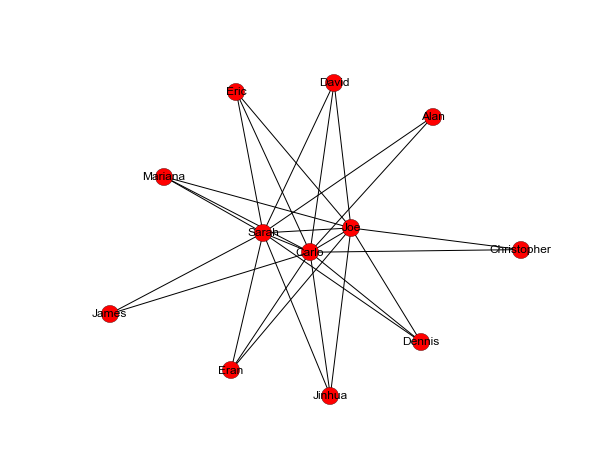

In [81]:
# Let's define an empty undirected graph.
G = nx.Graph()
# add nodes to the graph representing people
names = ['Sarah','Jinhua','Mariana','Eran','Alan',
         'Joe','Dennis', 'David', 'Eric', 'Carlo', 'James', 'Christopher']

last_names = ['Williams','Zhao','Arcaya','Ben-Joseph','Berger',
        'Ferreira','Frenchman', 'Hsu', 'Klopfer', 'Ratti', 'Wescoat', 'Zegras']
for i in range(len(names)):
    G.add_node(names[i], last_name=last_names[i])

# Accessing nodes and node data.
node = G.node['Sarah']
print "Sarah's Node: "+str(node)
print "Sarah's Lastname: "+node['last_name']


# note that there is a lot of freedom in providing edge metadata.
# also, the relationships strengths are completely random.
G.add_edge('Sarah','Jinhua',relationshipStrength=2)
G.add_edge('Sarah','Mariana',relationshipStrength=10)
G.add_edge('Sarah','Eran',relationshipStrength=20)
G.add_edge('Sarah','Alan',relationshipStrength=5)
G.add_edge('Sarah','Joe', relationshipStrength=30)
G.add_edge('Sarah','Dennis',relationshipStrength=5)
G.add_edge('Sarah','David',relationShipStrength=10)
G.add_edge('Sarah','Eric',relationshipStrength=5)
G.add_edge('Sarah','Carlo', relationshipStrength=20)
G.add_edge('Sarah','James',relationshipStrength=5)

print "Sarah-Alan edge: "+str(G['Sarah']['Alan'])

G.add_edge('Carlo','Jinhua',relationshipStrength=2)
G.add_edge('Carlo','Mariana',relationshipStrength=10)
G.add_edge('Carlo','Eran',relationshipStrength=20)
G.add_edge('Carlo','Alan',relationshipStrength=5)
G.add_edge('Carlo','Joe', relationshipStrength=30)
G.add_edge('Carlo','Dennis',relationshipStrength=5)
G.add_edge('Carlo','David',relationShipStrength=10)
G.add_edge('Carlo','Eric',relationshipStrength=5)
G.add_edge('Carlo','Sarah', relationshipStrength=20)
G.add_edge('Carlo','James',relationshipStrength=5)
G.add_edge('Carlo','Christopher',relationshipStrength=5)

G.add_edge('Joe','Jinhua',relationshipStrength=2)
G.add_edge('Joe','Mariana',relationshipStrength=10)
G.add_edge('Joe','Eran',relationshipStrength=20)
G.add_edge('Joe','Dennis',relationshipStrength=5)
G.add_edge('Joe','David',relationShipStrength=10)
G.add_edge('Joe','Eric',relationshipStrength=5)
G.add_edge('Joe','Sarah', relationshipStrength=20)
G.add_edge('Joe','Carlo',relationshipStrength=5)
G.add_edge('Joe','Christopher',relationshipStrength=5)

plt.figure(figsize=(8,6));
P = nx.spring_layout(G);
nx.draw(G,pos=P);
nx.draw_networkx_labels(G,pos=P); # semicolon suppresses output

The **degree distribution** is a 'thumb-print' that allows us to understand the structure and dynamics of a networked system.

In [82]:
degrees = nx.degree(G)
print "All degrees: "+str(degrees)
print degrees['Alan']
print "degree of Mariana: "+str(G.degree('Mariana'))
D = degrees.values()

All degrees: {'Sarah': 10, 'Mariana': 3, 'Eran': 3, 'James': 2, 'Jinhua': 3, 'Alan': 2, 'David': 3, 'Christopher': 2, 'Joe': 9, 'Dennis': 3, 'Carlo': 11, 'Eric': 3}
2
degree of Mariana: 3


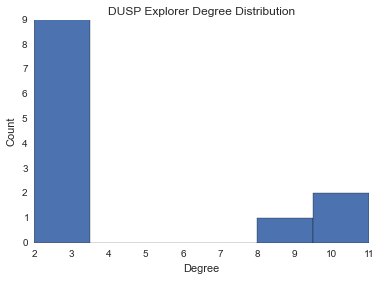

In [83]:
plt.figure()
plt.hist(D,6)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('DUSP Explorer Degree Distribution')
# Answer:
# As n gets large, degree dist is a Poisson distribution.
plt.show()

### 2. Riyadh Road Network

Some

In [84]:
df = pd.read_csv("data/riyadh_route_edges_am.txt", sep=" ", index_col=0)

# Let's define an empty undirected graph.
RG = nx.Graph()

# We also define the values for the edge attributes
keys = ['volume', 'capacity', 'voc', 'degree', 'free_travel_time', 'travel_time']
i = 0
for row in df.itertuples(index=False):
    i +=1
    # If we use all the nodes, plotting the network takes a very long time!
    if i < 3000:
        values = row[2:]
        # We create a dictionary with the keys and row values
        edge_attributes = dict(zip(keys, values))
        # We add the edge to the graph
        RG.add_edge(*(row[0], row[1]), attr_dict=edge_attributes)
degrees = nx.degree(RG)

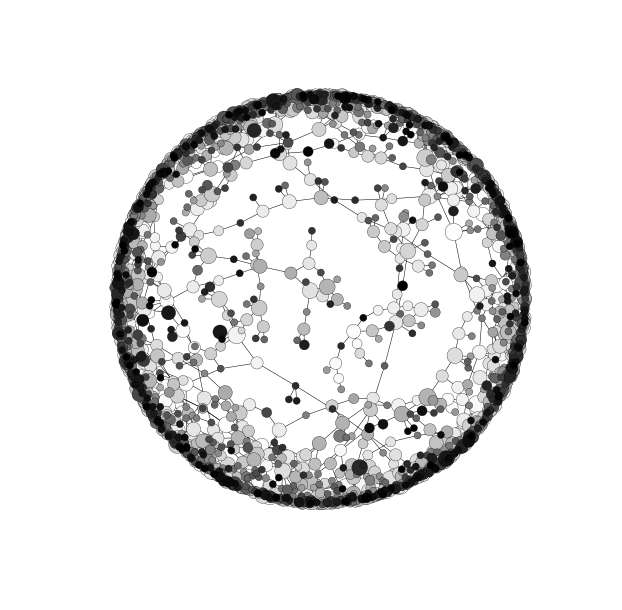

In [85]:
plt.figure(figsize=(8,8))
P = nx.spring_layout(RG)

node_sizes = [v * 50 for v in degrees.values()]
node_colors = range(len(RG.nodes()))
nx.draw(RG, pos=P, node_size=node_sizes, width=.5, node_color=node_colors);

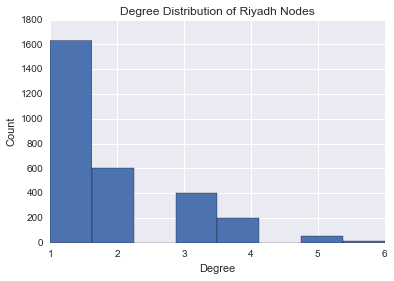

In [98]:
sns.set_style("darkgrid")
plt.figure()
plt.hist(degrees.values(),8)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution of Riyadh Nodes')

plt.show()

In [87]:
# If I pick any two intersections, is it possible to find a route 
# between them? Check if the network is connected.
print "Is the road network connected? "+str(nx.is_connected(RG))

paths = nx.shortest_path(RG)
print "All paths from node-100: "+str(paths[100])
print "Length of path from node 0 to node 18 is "+str(len(paths[100][2093]))

Is the road network connected? False
All paths from node-100: {193: [100, 194, 193], 194: [100, 194], 99: [100, 99], 100: [100], 5701: [100, 194, 193, 5701], 6920: [100, 194, 622, 6920], 1741: [100, 194, 622, 623, 1741], 622: [100, 194, 622], 623: [100, 194, 622, 623], 9137: [100, 194, 622, 627, 9137], 626: [100, 194, 622, 627, 626], 627: [100, 194, 622, 627], 2093: [100, 194, 622, 627, 626, 2093], 2711: [100, 2711]}
Length of path from node 0 to node 18 is 6


#### Plotting the Nodes with Geographical Location

TODO

In [88]:
nodes_df = pd.read_csv("data/riyadh_nodes.txt", sep=" ", index_col=0)

loc_dict = {}
for node_index in RG.nodes():
    loc_dict[node_index] = (float(nodes_df.loc[[node_index]]['st_x']), float(nodes_df.loc[[node_index]]['st_y']))

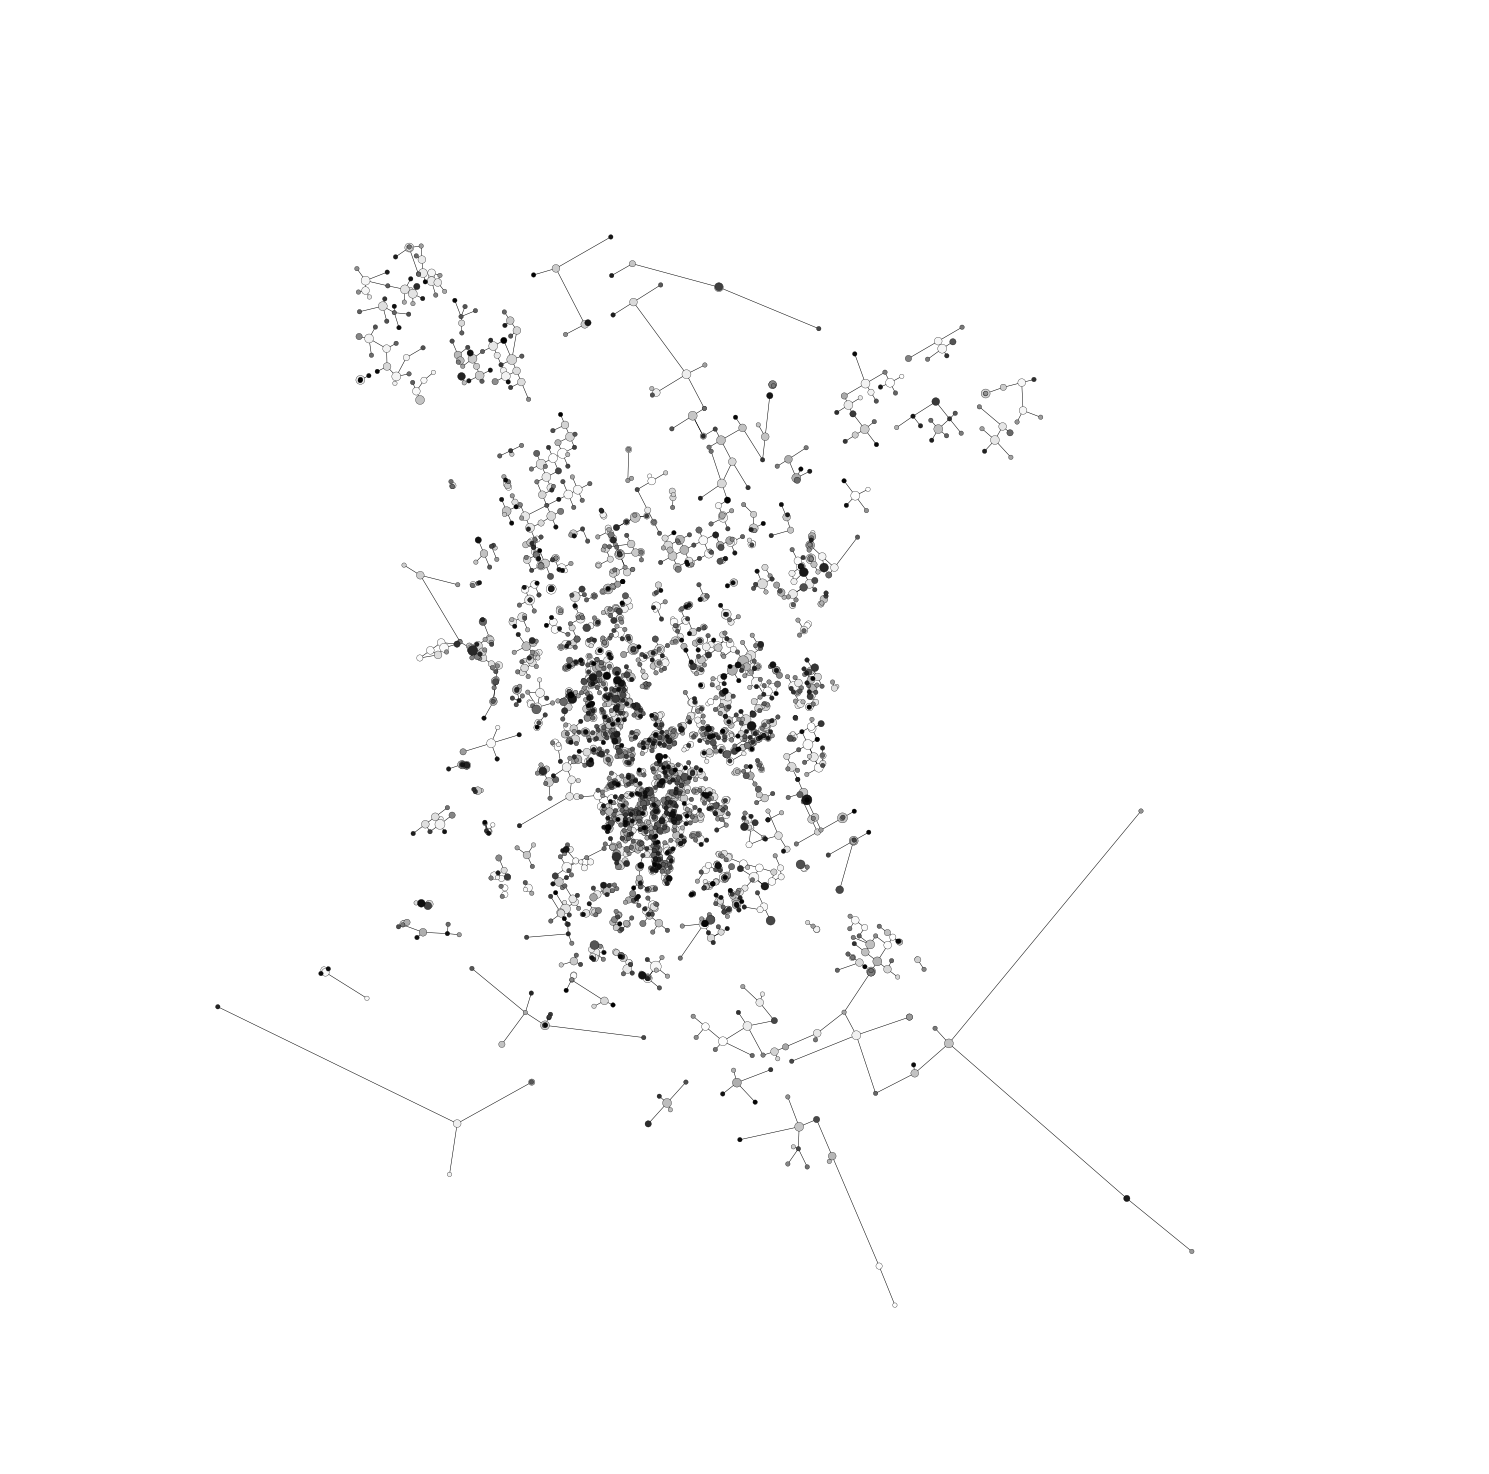

In [89]:
plt.figure(figsize=(20,20))

node_sizes = [v * 20 for v in degrees.values()]
node_colors = range(len(RG.nodes()))
nx.draw(RG, pos=loc_dict, node_size=node_sizes, width=.5, node_color=node_colors);

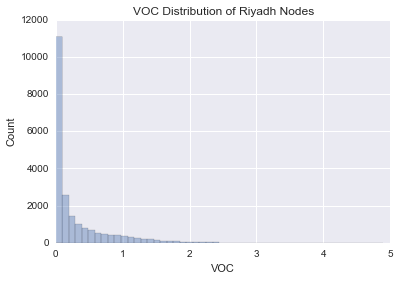

In [106]:
sns.set_style("darkgrid")
sns.distplot(df['voc'], kde=False)

plt.xlabel('VOC')
plt.ylabel('Count')
plt.title('VOC Distribution of Riyadh Nodes')

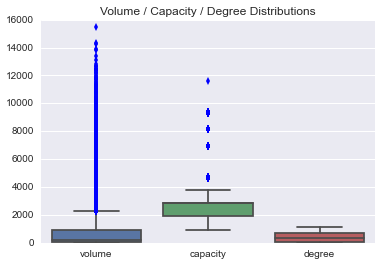

In [108]:
sns.set_style("darkgrid")
ax = sns.boxplot(data=df[['volume', 'capacity','degree']])
plt.title('Volume / Capacity / Degree Distributions')

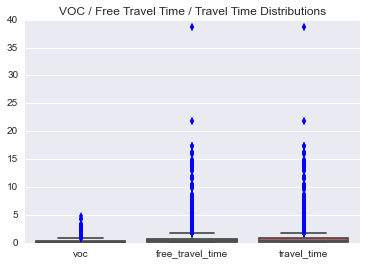

In [109]:
sns.set_style("darkgrid")
ax = sns.boxplot(data=df[['voc', 'free_travel_time','travel_time']])
plt.title('VOC / Free Travel Time / Travel Time Distributions')

### Exercise

Compare multiple times of the day